<a href="https://colab.research.google.com/github/AnVo01/KiemTra/blob/main/Food_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.layers import Dense,Flatten, Dropout
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

train = ImageDataGenerator(rescale = 1./255,
                           width_shift_range=0.2,
                           rotation_range=40,
                           shear_range=0.2,
                           height_shift_range=0.2,
                           zoom_range=0.2,
                           fill_mode='nearest',
                           horizontal_flip=True)
validation = ImageDataGenerator(rescale = 1./255)

train_data = train.flow_from_directory('/content/drive/MyDrive/KT/Training',
                                       target_size = (150,150),
                                       class_mode = 'categorical')
validation_dataset = train.flow_from_directory('/content/drive/MyDrive/KT/Validation',
                                       target_size = (150,150),
                                       class_mode = 'categorical')

model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(4,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_data,epochs=20,batch_size=128,validation_data=validation_dataset,verbose=1)

Found 68 images belonging to 4 classes.
Found 12 images belonging to 4 classes.
Epoch 1/20
3/3 [==============================] - 2s 750ms/step - loss: 21.4946 - accuracy: 0.2206 - val_loss: 24.9171 - val_accuracy: 0.2500
Epoch 2/20
3/3 [==============================] - 1s 556ms/step - loss: 16.2492 - accuracy: 0.2500 - val_loss: 7.1515 - val_accuracy: 0.2500
Epoch 3/20
3/3 [==============================] - 1s 550ms/step - loss: 6.3308 - accuracy: 0.2500 - val_loss: 2.4451 - val_accuracy: 0.5000
Epoch 4/20
3/3 [==============================] - 1s 371ms/step - loss: 3.0088 - accuracy: 0.4412 - val_loss: 2.3378 - val_accuracy: 0.5000
Epoch 5/20
3/3 [==============================] - 1s 378ms/step - loss: 2.0017 - accuracy: 0.4853 - val_loss: 1.5203 - val_accuracy: 0.3333
Epoch 6/20
3/3 [==============================] - 1s 371ms/step - loss: 1.1222 - accuracy: 0.5000 - val_loss: 0.9786 - val_accuracy: 0.5000
Epoch 7/20
3/3 [==============================] - 1s 538ms/step - loss: 1.056

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 43808)             0         
                                                                 
 dense_14 (Dense)            (None, 64)               

In [ ]:
score = model.evaluate(validation_dataset,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('độ chính xác kiểm tra là: ',score[1])

Sai số kiểm tra là:  0.4662722051143646
độ chính xác kiểm tra là:  0.8333333134651184


In [ ]:
train_data.class_indices

{'BanhDaLon': 0, 'BanhHoi': 1, 'BanhUot': 2, 'BanhXeo': 3}

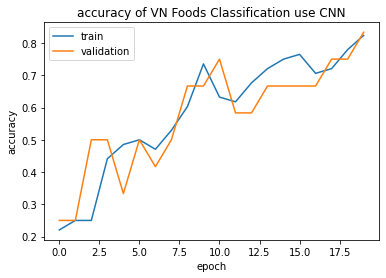

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy of VN Foods Classification use CNN')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

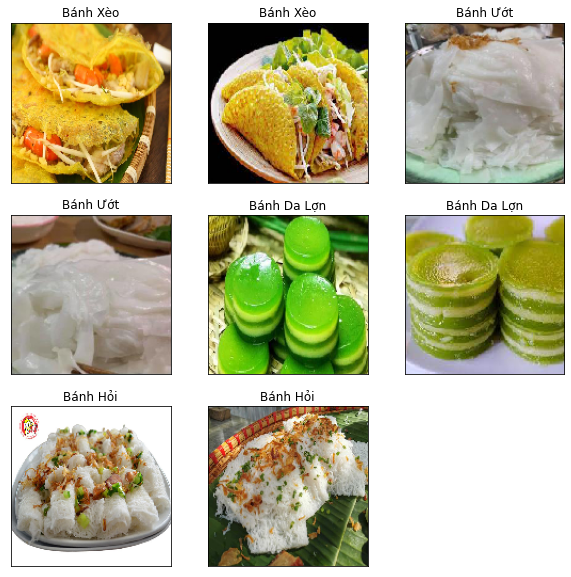

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
names = ['Bánh Da Lợn','Bánh Hỏi','Bánh Ướt','Bánh Xèo' ]
dir = '/content/drive/MyDrive/KT/Testing'
plt.figure(figsize=(10,10))
for i in range(8):
  plt.subplot(3,3,i + 1)
  img = load_img(dir +'/'+ str(i)+'.jpg', target_size=(150,150))
  plt.imshow(img)
  img = img_to_array(img)
  img = img.reshape(1,150,150,3)
  image = img/255.0
  plt.xticks([])
  plt.yticks([])
  plt.title(names[np.argmax(model.predict(image))])

In [ ]:
Link data: https://drive.google.com/drive/folders/19DrFzirArTeGfyt_hE_T3sDICF5D8YY9?usp=sharing